In [1]:
from pyspark import SparkContext, RDD
import json
import matplotlib.pyplot as plt

sc = SparkContext()
print("AAA")

23/05/28 19:41:26 WARN Utils: Your hostname, enriqueVB resolves to a loopback address: 127.0.1.1; using 10.0.2.15 instead (on interface enp0s3)
23/05/28 19:41:26 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/05/28 19:41:29 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
23/05/28 19:41:33 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


AAA


In [2]:
!head -10 202210.json

{"_id": "2022-10-01T00:05:05.771548", "stations": [{"activate": 1, "name": "Puerta del Sol A", "reservations_count": 0, "light": 2, "total_bases": 30, "free_bases": 9, "number": "1a", "longitude": "-3.7018341", "no_available": 0, "address": "Puerta del Sol n\u00ba 1", "latitude": "40.4172137", "dock_bikes": 18, "id": 1}, {"activate": 1, "name": "Puerta del Sol B", "reservations_count": 0, "light": 2, "total_bases": 30, "free_bases": 9, "number": "1b", "longitude": "-3.701602938060457", "no_available": 0, "address": "Puerta del Sol n\u00ba 1", "latitude": "40.41731271011562", "dock_bikes": 17, "id": 2}, {"activate": 1, "name": "Miguel Moya", "reservations_count": 0, "light": 2, "total_bases": 24, "free_bases": 15, "number": "2", "longitude": "-3.7058415", "no_available": 0, "address": "Calle Miguel Moya n\u00ba 1", "latitude": "40.4205886", "dock_bikes": 8, "id": 3}, {"activate": 1, "name": "Plaza Conde Suchil", "reservations_count": 0, "light": 1, "total_bases": 18, "free_bases": 0, "n

{"_id": "2022-10-01T02:05:09.305373", "stations": [{"activate": 1, "name": "Puerta del Sol A", "reservations_count": 0, "light": 2, "total_bases": 30, "free_bases": 15, "number": "1a", "longitude": "-3.7018341", "no_available": 0, "address": "Puerta del Sol n\u00ba 1", "latitude": "40.4172137", "dock_bikes": 12, "id": 1}, {"activate": 1, "name": "Puerta del Sol B", "reservations_count": 0, "light": 2, "total_bases": 30, "free_bases": 12, "number": "1b", "longitude": "-3.701602938060457", "no_available": 0, "address": "Puerta del Sol n\u00ba 1", "latitude": "40.41731271011562", "dock_bikes": 15, "id": 2}, {"activate": 1, "name": "Miguel Moya", "reservations_count": 0, "light": 0, "total_bases": 24, "free_bases": 19, "number": "2", "longitude": "-3.7058415", "no_available": 0, "address": "Calle Miguel Moya n\u00ba 1", "latitude": "40.4205886", "dock_bikes": 4, "id": 3}, {"activate": 1, "name": "Plaza Conde Suchil", "reservations_count": 0, "light": 2, "total_bases": 18, "free_bases": 10,

{"_id": "2022-10-01T06:05:15.006713", "stations": [{"activate": 1, "name": "Puerta del Sol A", "reservations_count": 0, "light": 0, "total_bases": 30, "free_bases": 25, "number": "1a", "longitude": "-3.7018341", "no_available": 0, "address": "Puerta del Sol n\u00ba 1", "latitude": "40.4172137", "dock_bikes": 2, "id": 1}, {"activate": 1, "name": "Puerta del Sol B", "reservations_count": 0, "light": 0, "total_bases": 30, "free_bases": 25, "number": "1b", "longitude": "-3.701602938060457", "no_available": 0, "address": "Puerta del Sol n\u00ba 1", "latitude": "40.41731271011562", "dock_bikes": 4, "id": 2}, {"activate": 1, "name": "Miguel Moya", "reservations_count": 0, "light": 0, "total_bases": 24, "free_bases": 21, "number": "2", "longitude": "-3.7058415", "no_available": 0, "address": "Calle Miguel Moya n\u00ba 1", "latitude": "40.4205886", "dock_bikes": 2, "id": 3}, {"activate": 1, "name": "Plaza Conde Suchil", "reservations_count": 0, "light": 2, "total_bases": 18, "free_bases": 8, "n

In [18]:
rdd = sc.textFile("201906_Usage_Bicimad.json")
rdd.top(2)

['{ "_id" : { "$oid" : "5d193180a9cd6441ac491781" }, "user_day_code" : "a2859c578a940a5b6f9697d37bbb60887b59668b74f4abb3640db9eab8ecced8", "idplug_base" : 3, "user_type" : 1, "idunplug_base" : 19, "travel_time" : 301, "idunplug_station" : 30, "ageRange" : 5, "idplug_station" : 130, "unplug_hourTime" : { "$date" : "2019-06-26T23:00:00.000+0200" }, "zip_code" : "28010" }',
 '{ "_id" : { "$oid" : "5d193180a9cd6441ac491780" }, "user_day_code" : "a155966b8f5dfaeaac34612d902eab89b8dc590df6b9e9ca8b7888ed067e2290", "idplug_base" : 6, "user_type" : 1, "idunplug_base" : 6, "travel_time" : 2199, "idunplug_station" : 35, "ageRange" : 0, "idplug_station" : 2, "unplug_hourTime" : { "$date" : "2019-06-26T23:00:00.000+0200" }, "zip_code" : "" }']

In [48]:
def get_stations(line):
    data = json.loads(line)
    salida = data["idunplug_station"]
    entrada = data["idplug_station"]
    user = data["user_type"]
    return salida, entrada, user

rdd1 = rdd.map(get_stations).filter(lambda x: x[2]<=1)



In [49]:
rdd2 = rdd1.filter(lambda x: x[0]!=x[1]).map(lambda x: ((min(x[0],x[1]),max(x[0],x[1])),1))
rdd2.top(4)#Podemos ver que lo que hay son id de cada uno de los días y el historial de 

[((207, 213), 1), ((207, 213), 1), ((207, 213), 1), ((207, 213), 1)]

In [50]:
rdd3 = rdd2.groupByKey().map(lambda x: (x[0], len(x[1])))
print(rdd3.max(key = (lambda x: x[1])))
rdd3.top(5)

((9, 149), 490)


[((207, 213), 7),
 ((207, 211), 6),
 ((201, 207), 1),
 ((200, 213), 1),
 ((200, 211), 5)]

In [54]:
numLimite = rdd3.map((lambda x: x[1])).collect().sort()[-100]#Para ordenar de mayor a menor
rdd4 = rdd3.filter(lambda x: x[1] > numLimite)#Nos quedamos con los 100 mejores 
listaMejoresTrayectos = rdd4.map(lambda x: x[1]).collect()
rdd5 = rddFranjaHoraria.filter(lambda x: x[1] in listaMejoresTrayectos)#Siendo x[1] los trayectos


[((207, 213), 7),
 ((207, 211), 6),
 ((201, 207), 1),
 ((200, 213), 1),
 ((200, 211), 5),
 ((200, 207), 3),
 ((200, 201), 21),
 ((190, 211), 1),
 ((190, 207), 2),
 ((190, 201), 8)]

In [66]:
rdd5prueba = rdd3.filter(lambda x: int(x[0][0][-2:])<10)
rdd5prueba.top(rdd5prueba.count())

[(('2022-10-09', 'Ronda de Atocha nº 34'), 24),
 (('2022-10-09', 'Ronda de Atocha nº 2'), 24),
 (('2022-10-09', 'Puerta del Sol nº 1'), 48),
 (('2022-10-09', 'Plaza del Cordón'), 24),
 (('2022-10-09', 'Plaza del Conde del Valle de Súchil nº 3'), 24),
 (('2022-10-09', 'Plaza del Conde de Romanones nº 9'), 24),
 (('2022-10-09', 'Plaza del Conde de Casal nº 8'), 24),
 (('2022-10-09', 'Plaza del Carmen nº 1'), 24),
 (('2022-10-09', 'Plaza de las Salesas 7'), 24),
 (('2022-10-09', 'Plaza de la República Argentina nº 6'), 24),
 (('2022-10-09', 'Plaza de la Provincia nº 1'), 24),
 (('2022-10-09', 'Plaza de la Independencia nº 6'), 24),
 (('2022-10-09', 'Plaza de la Cebada nº 16 '), 24),
 (('2022-10-09', 'Plaza de Santo Domingo nº 1'), 24),
 (('2022-10-09', 'Plaza de Santa Ana nº 10'), 24),
 (('2022-10-09', 'Plaza de San Miguel nº 9'), 24),
 (('2022-10-09', 'Plaza de San Juan de la Cruz nº 11'), 24),
 (('2022-10-09', 'Plaza de San Ildefonso'), 24),
 (('2022-10-09', 'Plaza de San Francisco nº 5

In [68]:
rdd4 = rdd2.map(lambda x: (x[0][0][-2:], x[1])).groupByKey().map(lambda x: (x[0], len(list(x[1]))))#Numero de bicis cogidas por dia
rddMean = rdd4.map(lambda x: x[1]).mean()

In [69]:
rddMean#Esta es la media de bicis en octubre cogidas al día 

6293.419354838709

In [87]:
minimo = rdd4.min(key = (lambda x: x[1]))
maximo = rdd4.max(key = (lambda x: x[1]))

print(f"Mínimo número de bicis que se cogen en un día:{minimo[1]}\nMáximo número de bicis que se cogen en un día :{maximo[1]}")

Mínimo número de bicis que se cogen en un día:5808
Máximo número de bicis que se cogen en un día :6336


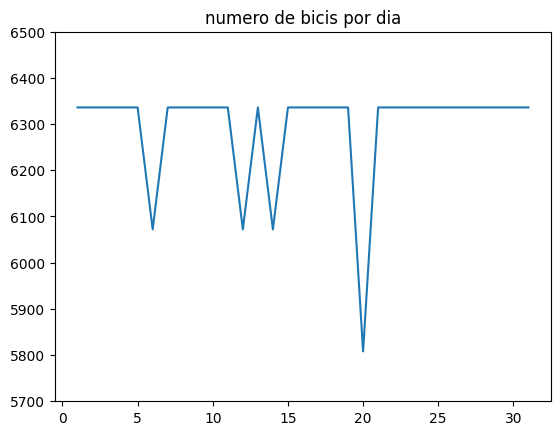

In [88]:
rdd5 = rdd4.sortBy(lambda x: int(x[0]))
rddDias = rdd5.map(lambda x: int(x[0]))
rddNumBicis = rdd5.map(lambda x: x[1])
plt.plot(rddDias.collect(), rddNumBicis.collect())
plt.title("numero de bicis por dia")
plt.ylim([5700, 6500])
plt.show()

#Como tampoco es que saquemos mucho de esto más que al parecer hay una cota en 6336 de bicis que se cogen al día 

In [83]:
rdd5.collect()#como podemos comprobar la mayoría de los valores son 6336

[('01', 6336),
 ('02', 6336),
 ('03', 6336),
 ('04', 6336),
 ('05', 6336),
 ('06', 6072),
 ('07', 6336),
 ('08', 6336),
 ('09', 6336),
 ('10', 6336),
 ('11', 6336),
 ('12', 6072),
 ('13', 6336),
 ('14', 6072),
 ('15', 6336),
 ('16', 6336),
 ('17', 6336),
 ('18', 6336),
 ('19', 6336),
 ('20', 5808),
 ('21', 6336),
 ('22', 6336),
 ('23', 6336),
 ('24', 6336),
 ('25', 6336),
 ('26', 6336),
 ('27', 6336),
 ('28', 6336),
 ('29', 6336),
 ('30', 6336),
 ('31', 6336)]

Vamos a ver cómo varía el número de bicis por cada estación según el día 

In [98]:
#Para ello volvamos a usar rdd2
rdd6 = rdd2.groupByKey().map(lambda x: (x[0], len(list(x[1])))).\
        map(lambda x: (x[0][1],(int(x[0][0][-2:]), x[1]))).groupByKey() #agrupamos por estación
rdd6.top(3)

[('Ronda de Atocha nº 34',
  <pyspark.resultiterable.ResultIterable at 0x7fec06df3c40>),
 ('Ronda de Atocha nº 2',
  <pyspark.resultiterable.ResultIterable at 0x7fec06e18640>),
 ('Puerta del Sol nº 1',
  <pyspark.resultiterable.ResultIterable at 0x7fec06e196c0>)]

In [103]:
#Vamos a coger una muestra aleatoria de algunas estaciones distintas y vamos a dibujar cómo es el número de bicis que 
#se coge en cada una
rddSample = rdd6.sample(False, 10/rdd.count())
rddSamplelist = rddSample.collect()#Podemos ver la muestra que hemos cogido

In [107]:
for sample in rddSamplelist:
    sample[1].sort(key = (lambda x: x[1]))
    rddSampleDias = list(map(lambda x: x[0], sample[1]))
    rddSampleValores = list(map(lambda x: x[1], sample[1]))
    plt.plot(rddSampleDias, rddSampleValores)
    plt.title(f"Plot para estacion: {sample[0]}")
    plt.show()

AttributeError: 'ResultIterable' object has no attribute 'sort'